In [1]:
from pybalmorel import Balmorel
from pybalmorel.utils import symbol_to_df
import matplotlib.pyplot as plt

# Collect results
m = Balmorel('../', gams_system_directory='/appl/gams/47.6.0')
m.collect_results()

Folder analysis not added to scenario as the necessary analysis/model/Balmorel.gms and/or analysis/model/cplex.op4 did not exist
Folder simex_N2 not added to scenario as the necessary simex_N2/model/Balmorel.gms and/or simex_N2/model/cplex.op4 did not exist
Folder simex_N30 not added to scenario as the necessary simex_N30/model/Balmorel.gms and/or simex_N30/model/cplex.op4 did not exist
Folder .github not added to scenario as the necessary .github/model/Balmorel.gms and/or .github/model/cplex.op4 did not exist
Folder logs not added to scenario as the necessary logs/model/Balmorel.gms and/or logs/model/cplex.op4 did not exist
Folder simex_N10 not added to scenario as the necessary simex_N10/model/Balmorel.gms and/or simex_N10/model/cplex.op4 did not exist
Folder simex_base not added to scenario as the necessary simex_base/model/Balmorel.gms and/or simex_base/model/cplex.op4 did not exist
Folder simex_N50 not added to scenario as the necessary simex_N50/model/Balmorel.gms and/or simex_N5

In [3]:
# Interactive Bar Chart Plotting
m.results.interactive_bar_chart()

Result type: balmorel


GridBox(children=(Dropdown(description='Table:', layout=Layout(width='80%'), options=('F_CONS_YCRA', 'F_CONS_Y…

Output()

Stack(children=(GridBox(children=(SelectMultiple(description='Scenario', index=(0,), layout=Layout(height='99%…

Output()

Output()

HBox()

Output()

Output()

Output()

/tmp/ipykernel_1071191/1095416789.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


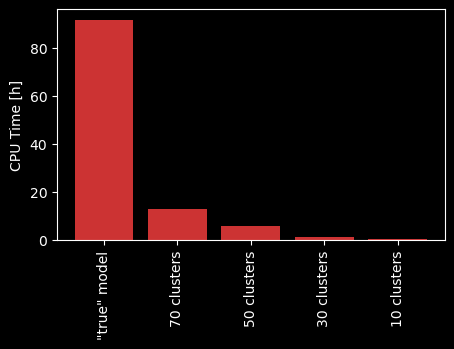

In [11]:
import matplotlib.pyplot as plt

aggregation = ['"true" model', '70 clusters', '50 clusters', '30 clusters', '10 clusters']
CPU_time = [91 + 33/60, 13, 5 + 55/60, 1 + 24/60, 40/60]

fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(aggregation, CPU_time, color=[0.8, .2, .2])
ax.set_ylabel('CPU Time [h]')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
fig.savefig('cpu_time.png', transparent=True, bbox_inches='tight')

# Investigate Overlap Effect

In [ ]:
# Load Results at High and Low Resolution
dfh = symbol_to_df(m.results.db['N70'], 'PRO_YCRAGFST')
dfm = symbol_to_df(m.results.db['N10'], 'PRO_YCRAGFST')
dfl = symbol_to_df(m.results.db['N2'], 'PRO_YCRAGFST')
# dfh_curt = symbol_to_df(m.results.db['N70'], 'CURT_YCRAFST')
# dfm_curt = symbol_to_df(m.results.db['N10'], 'CURT_YCRAFST')
# dfl_curt = symbol_to_df(m.results.db['N2'], 'CURT_YCRAFST')
dfh_el = symbol_to_df(m.results.db['N70'], 'EL_DEMAND_YCRST')
dfm_el = symbol_to_df(m.results.db['N10'], 'EL_DEMAND_YCRST')
dfl_el = symbol_to_df(m.results.db['N2'], 'EL_DEMAND_YCRST')
dfh_cap = symbol_to_df(m.results.db['N70'], 'G_CAP_YCRAF')
dfm_cap = symbol_to_df(m.results.db['N10'], 'G_CAP_YCRAF')
dfl_cap = symbol_to_df(m.results.db['N2'], 'G_CAP_YCRAF')


For scenario N70..
Total non-overlapping production at 50 pct: 218 TWh
Total non-overlapping production at 50 pct: 3 TWh/region
Average yearly power 35322.92 MW
Deviation in yearly power 17782.10 MW
Area           CL0_A  CL0_IDVU-SPACEHEAT  CL0_IND-HT-NODH  CL0_IND-LT-NODH  \
Technology                                                                   
WIND-ON     0.085412                 NaN              NaN              NaN   
WIND-OFF    0.000000                 NaN              NaN              NaN   

Area        CL0_IND-MT-NODH    CL10_A  CL10_IDVU-SPACEHEAT  CL10_IND-HT-NODH  \
Technology                                                                     
WIND-ON                 NaN  0.136203                  NaN               NaN   
WIND-OFF                NaN  0.000000                  NaN               NaN   

Area        CL10_IND-LT-NODH  CL10_IND-MT-NODH  ...     CL8_A  \
Technology                                      ...             
WIND-ON                  NaN        

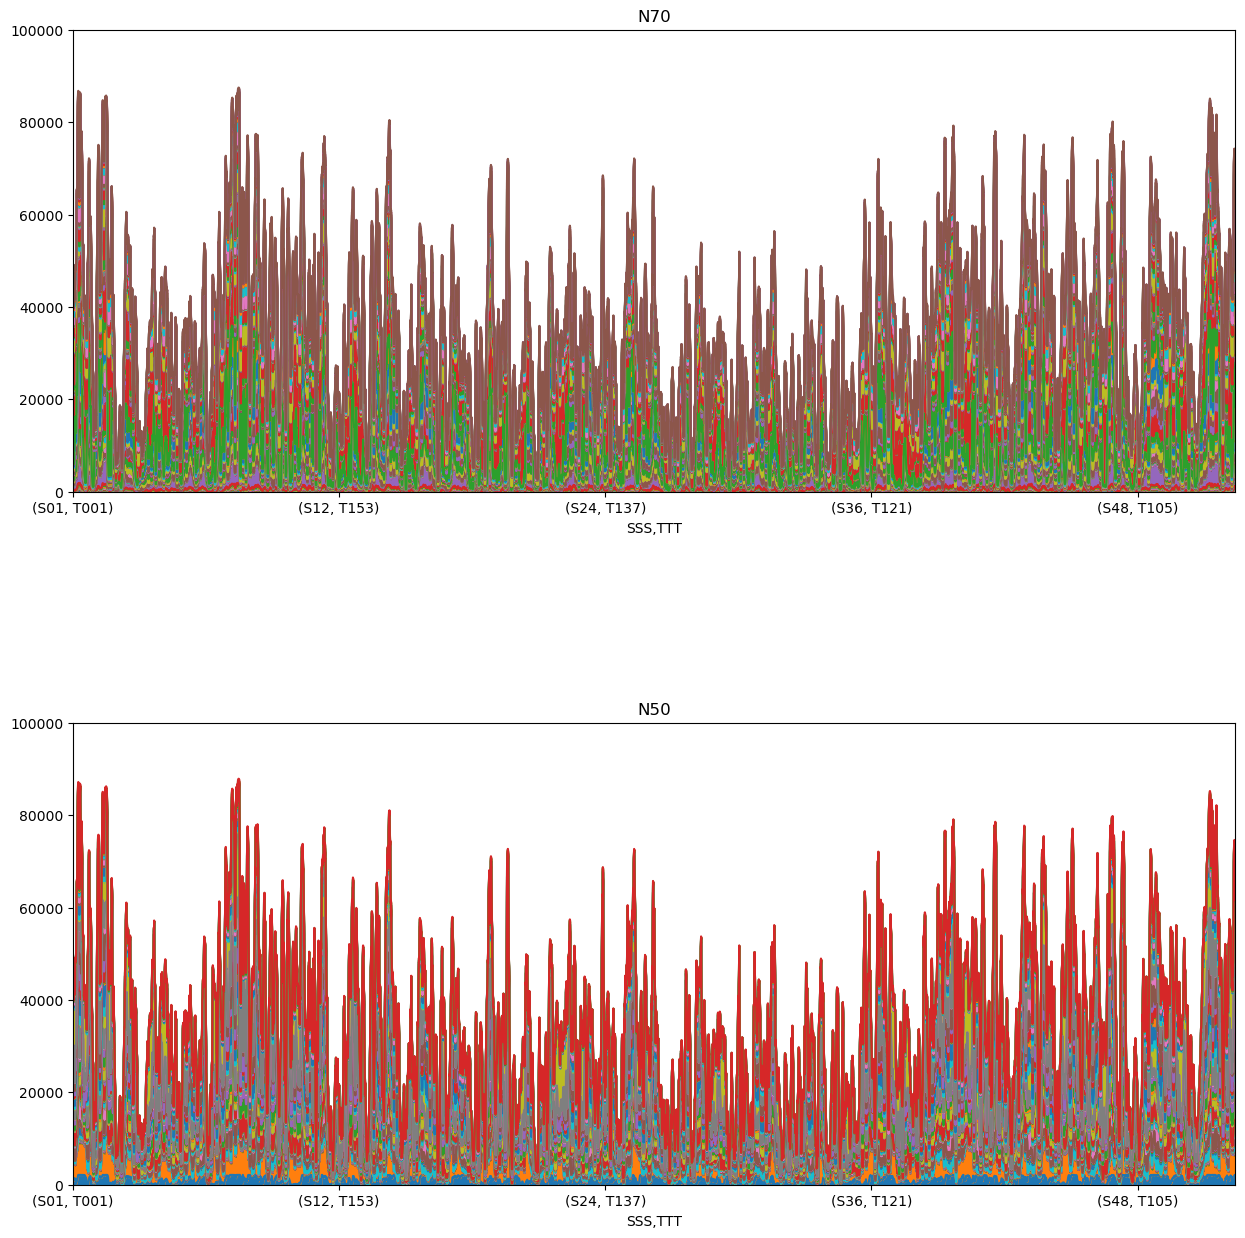

In [30]:
# Load inputs
# scenarios = ['N70', 'N50', 'N30', 'N10', 'N2']
scenarios = ['N70', 'N50']
for SC in scenarios:
    if SC not in m.input_data:
        m.load_incfiles(SC)

fig, axes = plt.subplots(nrows=len(scenarios), figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
n = 0
for SC in scenarios:
    # Get potential
    df_pot = symbol_to_df(m.input_data[SC], 'SUBTECHGROUPKPOT').query('TECH_GROUP == "WINDTURBINE_OFFSHORE" or TECH_GROUP == "WINDTURBINE_ONSHORE"').pivot_table(columns='CCCRRRAAA', values='Value', aggfunc='sum')    
    # print('Total potential: %0.2f'%df_pot.sum().sum())
    # Get profile
    df_pro = symbol_to_df(m.input_data[SC], 'WND_VAR_T').pivot_table(index=['SSS', 'TTT'], columns='AAA', values='Value')
    df_pro_normed = df_pro / df_pro.max() # Normalise
    
    # Calculate potential production
    prod_pot = df_pro_normed.mul(df_pot.sum())
    
    # Figure out when production is above X % of peak
    fraction_of_peak = 0.5
    idx = prod_pot >= prod_pot.max() * fraction_of_peak
    print('\nFor scenario %s..'%SC)
    # print('Peak production: ', prod_pot[idx][prod_pot.columns[0]].dropna())
    # print('Simultaneous peak production at %0.0f pct: %d h'%(fraction_of_peak*100, len(prod_pot[idx].dropna())))
    # print('Total overlaps at  %0.0f pct: %0.0f hours/region'%(fraction_of_peak*100, prod_pot[idx].count(axis=1).sum()/len(prod_pot.columns)))
    # print('Total non-overlaps at %0.0f pct: %0.0f hours'%(fraction_of_peak*100, len(prod_pot.index)*len(prod_pot.columns) - prod_pot[idx].count(axis=1).sum()))
    # print('Total non-overlaps at %0.0f pct: %0.0f hours/region'%(fraction_of_peak*100, len(prod_pot.index) - prod_pot[idx].count(axis=1).sum()/len(prod_pot.columns)))
    print('Total non-overlapping production at %0.0f pct: %0.0f TWh'%(fraction_of_peak*100, prod_pot[idx].sum().sum()/1e6))
    print('Total non-overlapping production at %0.0f pct: %0.0f TWh/region'%(fraction_of_peak*100, prod_pot[idx].sum().sum()/len(prod_pot.columns)/1e6))
    # print('Total non-overlapping production at %0.0f pct: %0.0f hours/region'%(fraction_of_peak*100, prod_pot[idx].isna().sum().sum()/len(prod_pot.columns)))
    # print('Sum of peak production: ', prod_pot.max().sum(), '\n')
    # print(df_pot.sum())
    
    # The average of maximum production through all geographies, at any point in time
    # (i.e.: What is the maximum possible production of wind that can be transmitted to the rest of the country on average, in any point in time?)
    print('Average yearly power %0.2f MW'%prod_pot.sum(axis=1).mean())
    print('Deviation in yearly power %0.2f MW'%prod_pot.sum(axis=1).std())

    prod_pot.plot.area(ax=axes[n], legend=False)
    axes[n].set_ylim([0, 100000])
    axes[n].set_xlim([0, 8736])
    axes[n].set_title(SC)
    n += 1
    
    
    # Calculate curtailment
    
    ## Production
    pro_actual = symbol_to_df(m.results.db[SC], 'PRO_YCRAGFST').pivot_table(index=['Season', 'Time'], columns='Area', values='Value')
    pot_actual = symbol_to_df(m.results.db[SC], 'G_CAP_YCRAF').pivot_table(index=['Technology'], columns='Area', values='Value').loc[['WIND-ON', 'WIND-OFF']]
    # df_pro_normed * G_CAP - PRO_YCRAGFST
    print(pot_actual)
    print(df_pro_normed)

Residual load for h resolution
10433233.670050763
Residual load for m resolution
10279490.927415723
Residual load for l resolution
9898263.191267822


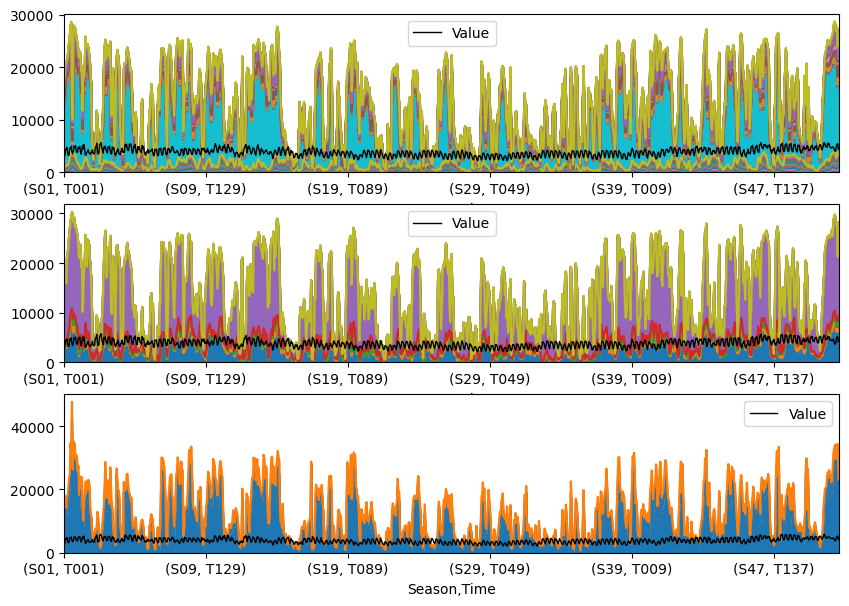

In [51]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 7))
n = 0
# ylims = [0, 50e3]
xlims = [0, 1092]
for res in ['h', 'm', 'l']:
    df = locals()['df%s'%res].query('Fuel == "WIND"').pivot_table(index=['Season', 'Time'], values='Value', columns='Region', aggfunc='sum') 
    # curt = locals()['df%s_curt'%res].query('Fuel == "WIND"').pivot_table(index=['Season', 'Time'], values='Value', columns='Region', aggfunc='sum') 
    el = locals()['df%s_el'%res].query('Category == "EXOGENOUS"').pivot_table(index=['Season', 'Time'], values='Value', aggfunc='sum') 
    cap = locals()['df%s_cap'%res].query('Fuel == "WIND"').pivot_table(columns='Region', values='Value', aggfunc='sum') 
    
    # print(df / cap.sum())
    df.plot.area(stacked=True, ax=axes[n], legend=False)
    el.plot(ax=axes[n], color='k', linewidth=1)
    
    print('Residual load for %s resolution'%res)
    print((df.sum(axis=1)-el.Value).sum())
    # print(el)
    
    # axes[n].set_ylim(ylims)
    axes[n].set_xlim(xlims)
    
    n += 1

# Other Transport

## Biomass

In [22]:
from pybalmorel.utils import symbol_to_df
import gams
import os
import numpy as np 

SC = 'N2'
ws = gams.GamsWorkspace(system_directory='/appl/gams/47.6.0')
db = ws.add_database_from_gdx(os.path.abspath('../%s/model/all_endofmodel.gdx'%SC))

df = symbol_to_df(db, 'VFUELTRANSPORT')
df


,Y,IRRRE,IRRRI,FFF,Value,Marginal,Lower,Upper,Scale
0,2050,CL0,CL0,STRAW,0.0,0.0,0.0,0.0,0.0
1,2050,CL0,CL0,WOOD,0.0,0.0,0.0,0.0,0.0
2,2050,CL0,CL1,STRAW,0.0,0.0,0.0,0.0,0.0
3,2050,CL0,CL1,WOOD,0.0,0.0,0.0,0.0,0.0
4,2050,CL1,CL0,STRAW,0.0,0.0,0.0,0.0,0.0
5,2050,CL1,CL0,WOOD,0.0,0.0,0.0,0.0,0.0
6,2050,CL1,CL1,STRAW,0.0,0.0,0.0,0.0,0.0
7,2050,CL1,CL1,WOOD,0.0,0.0,0.0,0.0,0.0


# Capacities on Map

  cluster_name                                           geometry      Value
0          CL1  MULTIPOLYGON (((8.97744 54.89568, 8.97298 54.8...   9.142028
1          CL0  MULTIPOLYGON (((11.51306 54.6232, 11.51272 54....  13.255470
  cluster_name                                           geometry  \
0          CL4  MULTIPOLYGON (((9.50472 54.85736, 9.50472 54.8...   
1          CL7  MULTIPOLYGON (((9.52139 57.00988, 9.52144 57.0...   
2          CL8  MULTIPOLYGON (((10.22028 56.1432, 10.21972 56....   
3          CL0  MULTIPOLYGON (((10.4325 54.88172, 10.4325 54.8...   
4          CL2  MULTIPOLYGON (((12.40695 55.61264, 12.40695 55...   
5          CL3  MULTIPOLYGON (((14.91695 55.01903, 14.91695 55...   
6          CL1  MULTIPOLYGON (((9.62451 55.75832, 9.60214 55.7...   
7          CL9  MULTIPOLYGON (((8.42417 55.32686, 8.42361 55.3...   
8          CL5  MULTIPOLYGON (((12.51554 55.6157, 12.51583 55....   

          Value  
0  1.110223e-16  
1  0.000000e+00  
2  0.000000e+00  
3  1.8

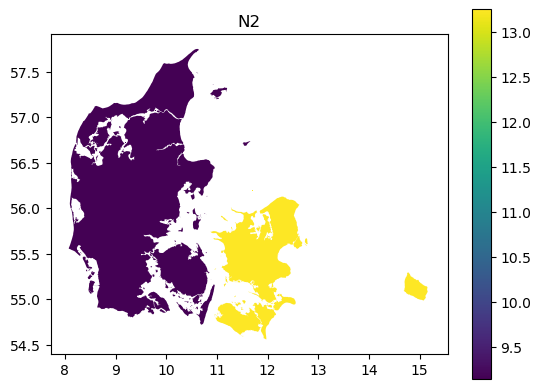

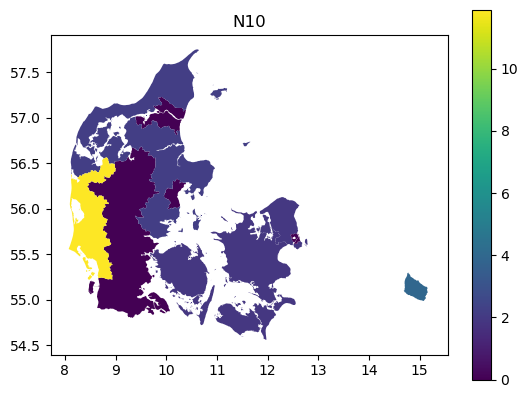

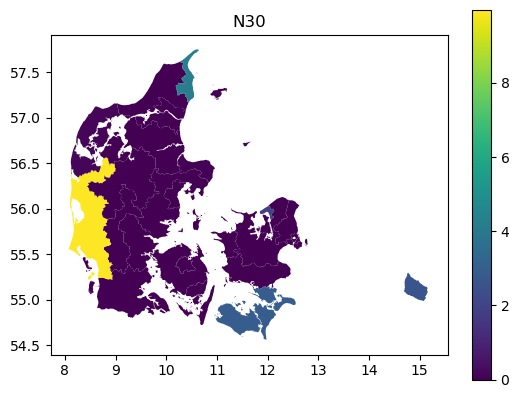

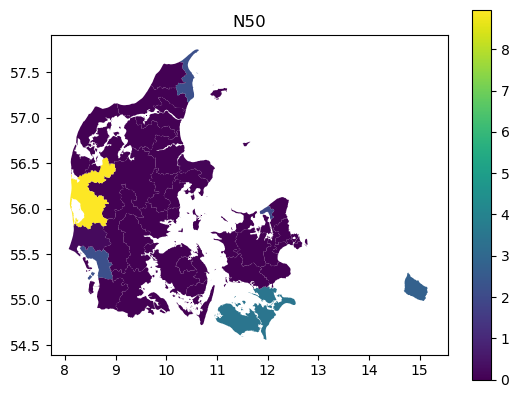

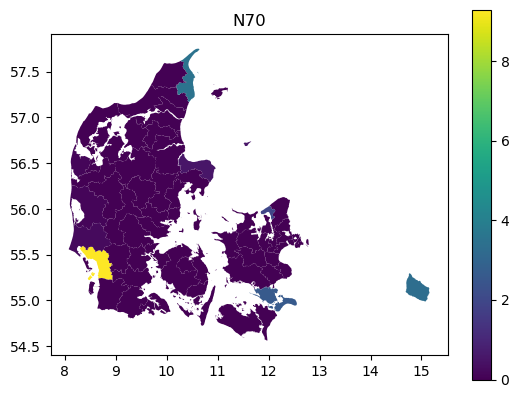

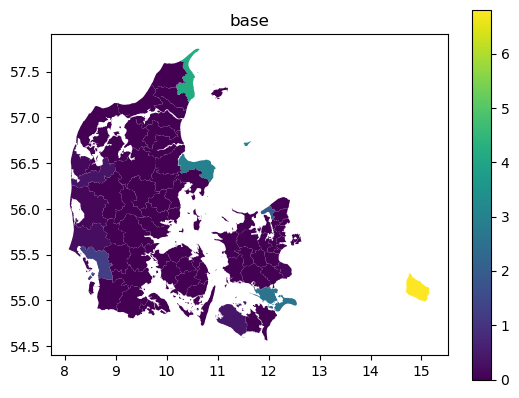

In [2]:
import geopandas as gpd

scenarios = ['N2', 'N10', 'N30', 'N50', 'N70', 'base']

df = m.results.get_result('G_CAP_YCRAF')
for SC in scenarios:
    fig, ax = plt.subplots()
    if SC != 'base':
        gf = gpd.read_file('geofiles/DE-DH-WNDFLH-SOLEFLH_%dcluster_geofile.gpkg'%(int(SC.lstrip('N'))))
    else:
        gf = gpd.read_file('geofiles/municipalities.gpkg')[['Name', 'geometry']]
        gf.columns = ['cluster_name', 'geometry']
    temp = df.query('Scenario == @SC and Technology == "WIND-OFF"')[['Region', 'Value']].pivot_table(index='Region', values='Value', aggfunc='sum').reset_index()
    temp.columns = ['cluster_name', 'Value']
    gf.merge(temp, on='cluster_name').plot(ax=ax, column='Value', legend=True)
    print(gf.merge(temp, on='cluster_name'))
    ax.set_title(SC)

In [16]:
from pybalmorel import MainResults

res = MainResults('MainResults_%s.gdx'%('N2DA_SSL_operun'), 
                  m.scname_to_scfolder['N2DA_SSL_operun'],
                  system_directory='/appl/gams/47.6.0')
res

/work3/mberos/Balmorel/analysis/DA_operun/MainResults_N2DA_SSL_operun.gdx


GamsException: Error opening GDX file: No such file or directory